# Imputed Log Reg vs Log Reg with Fairness Constraint

In [45]:
with open('./log_reg_imputed/log_reg_imputed_was_dist.pkl', 'rb') as file:
    all_was_dist = pickle.load(file)

with open('./log_reg_imputed/log_reg_imputed_sp.pkl', 'rb') as file:
    all_sp = pickle.load(file)

with open('./log_reg_imputed/log_reg_imputed_eo.pkl', 'rb') as file:
    all_eo = pickle.load(file)

with open('./log_reg_imputed/log_reg_imputed_max_gap.pkl', 'rb') as file:
    all_max_gap = pickle.load(file)

In [46]:
with open('./exponentiated_gradient_imputed/race/exponentiated_gradient_imputed_was_dist.pkl', 'rb') as file:
    all_was_dist_fair_race = pickle.load(file)

with open('./exponentiated_gradient_imputed/race/exponentiated_gradient_imputed_sp.pkl', 'rb') as file:
    all_sp_fair_race = pickle.load(file)

with open('./exponentiated_gradient_imputed/race/exponentiated_gradient_imputed_eo.pkl', 'rb') as file:
    all_eo_fair_race = pickle.load(file)

with open('./exponentiated_gradient_imputed/race/exponentiated_gradient_imputed_max_gap.pkl', 'rb') as file:
    all_max_gap_fair_race = pickle.load(file)

In [47]:
with open('./exponentiated_gradient_imputed/gender/exponentiated_gradient_imputed_was_dist.pkl', 'rb') as file:
    all_was_dist_fair_gender = pickle.load(file)

with open('./exponentiated_gradient_imputed/gender/exponentiated_gradient_imputed_sp.pkl', 'rb') as file:
    all_sp_fair_gender = pickle.load(file)

with open('./exponentiated_gradient_imputed/gender/exponentiated_gradient_imputed_eo.pkl', 'rb') as file:
    all_eo_fair_gender = pickle.load(file)

with open('./exponentiated_gradient_imputed/gender/exponentiated_gradient_imputed_max_gap.pkl', 'rb') as file:
    all_max_gap_fair_gender = pickle.load(file)

In [48]:
with open('./exponentiated_gradient_imputed/state_live_current/exponentiated_gradient_imputed_was_dist.pkl', 'rb') as file:
    all_was_dist_fair_state_live_current = pickle.load(file)

with open('./exponentiated_gradient_imputed/state_live_current/exponentiated_gradient_imputed_sp.pkl', 'rb') as file:
    all_sp_fair_state_live_current = pickle.load(file)

with open('./exponentiated_gradient_imputed/state_live_current/exponentiated_gradient_imputed_eo.pkl', 'rb') as file:
    all_eo_fair_state_live_current = pickle.load(file)

with open('./exponentiated_gradient_imputed/state_live_current/exponentiated_gradient_imputed_max_gap.pkl', 'rb') as file:
    all_max_gap_fair_state_live_current = pickle.load(file)

In [49]:
all_sp_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_sp_fair_race)):
    all_sp_fair[scenario]['race'] = all_sp_fair_race[scenario]['race']
    all_sp_fair[scenario]['gender'] = all_sp_fair_gender[scenario]['gender']
    all_sp_fair[scenario]['state_live_current'] = all_sp_fair_state_live_current[scenario]['state_live_current']

all_eo_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_eo_fair_race)):
    all_eo_fair[scenario]['race'] = all_eo_fair_race[scenario]['race']
    all_eo_fair[scenario]['gender'] = all_eo_fair_gender[scenario]['gender']
    all_eo_fair[scenario]['state_live_current'] = all_eo_fair_state_live_current[scenario]['state_live_current']

all_max_gap_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_max_gap_fair_race)):
    all_max_gap_fair[scenario]['race'] = all_max_gap_fair_race[scenario]['race']
    all_max_gap_fair[scenario]['gender'] = all_max_gap_fair_gender[scenario]['gender']
    all_max_gap_fair[scenario]['state_live_current'] = all_max_gap_fair_state_live_current[scenario]['state_live_current']

all_was_dist_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_was_dist_fair_race)):
    all_was_dist_fair[scenario]['race'] = all_was_dist_fair_race[scenario]['race']
    all_was_dist_fair[scenario]['gender'] = all_was_dist_fair_gender[scenario]['gender']
    all_was_dist_fair[scenario]['state_live_current'] = all_was_dist_fair_state_live_current[scenario]['state_live_current']

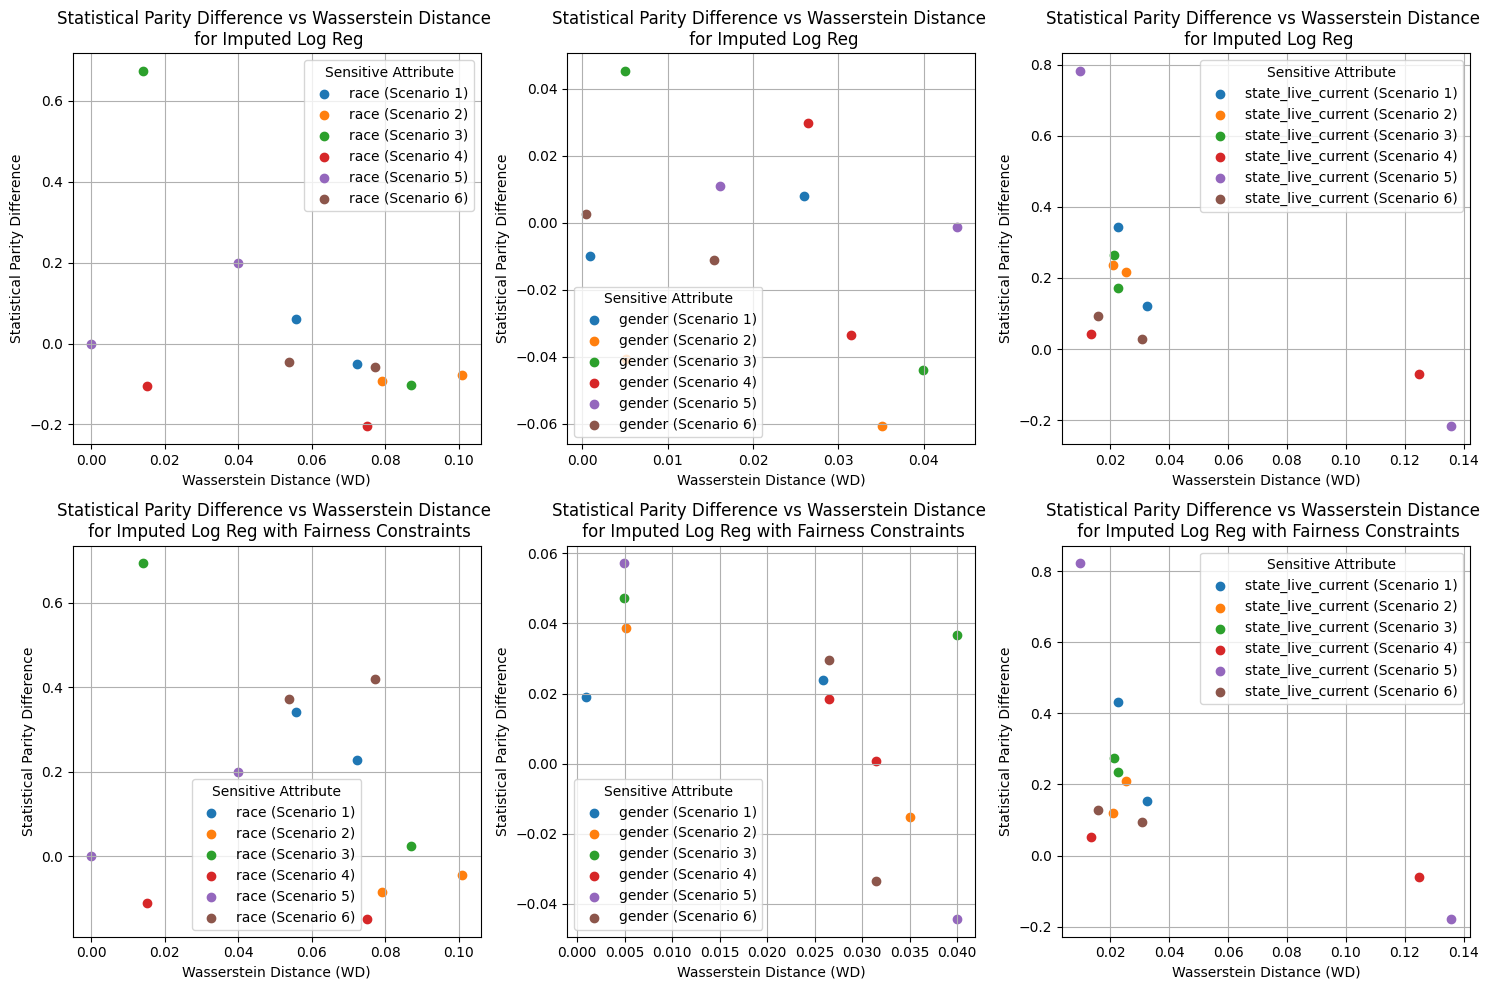

In [ ]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes[0, :]):
    attribute = protected_attributes[i]
    for x in range(len(all_sp)):
        x_values = all_was_dist[x][attribute]
        y_raw = all_sp[x][attribute]
        y_values = [y - y_raw[0] for y in y_raw]
        ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Statistical Parity Difference vs Wasserstein Distance \n for Imputed Log Reg")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Statistical Parity Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

for i, ax in enumerate(axes[1, :]):
    attribute = protected_attributes[i]
    for x in range(len(all_sp_fair)):
        x_values = all_was_dist_fair[x][attribute]
        y_raw = all_sp_fair[x][attribute]
        y_values = [y - y_raw[0] for y in y_raw]
        ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Statistical Parity Difference vs Wasserstein Distance \n for Imputed Log Reg with Fairness Constraints")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Statistical Parity Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()


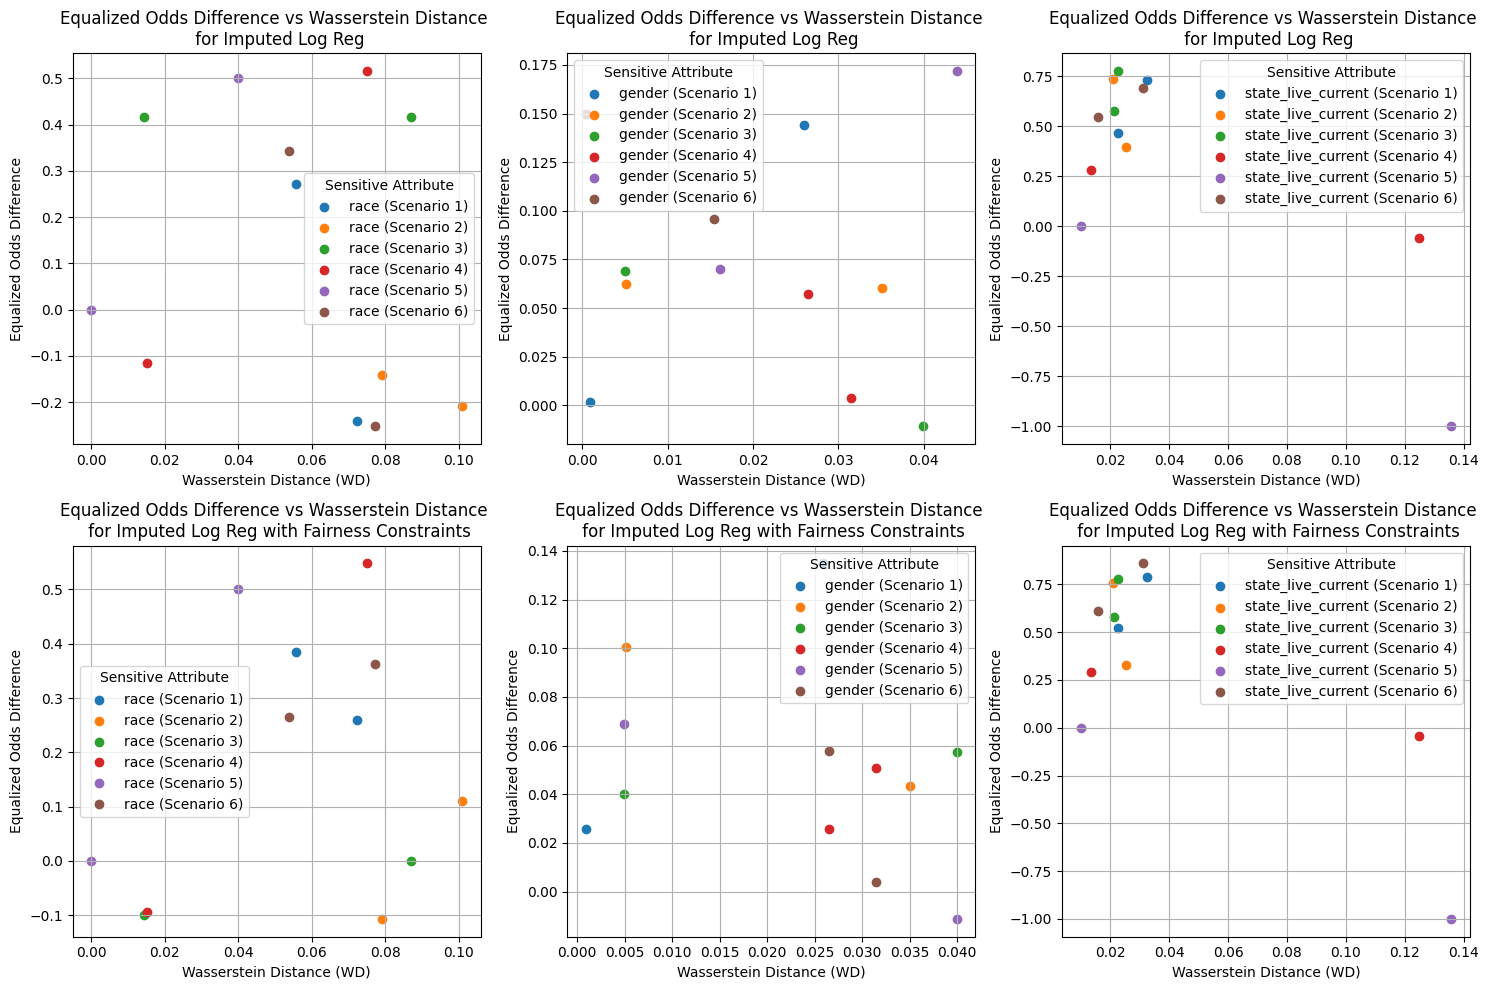

In [ ]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 

for i, ax in enumerate(axes[0, :]): 
    attribute = protected_attributes[i]
    for x in range(len(all_eo)):
        x_values = all_was_dist[x][attribute]
        y_raw = all_eo[x][attribute]
        y_values = [y - y_raw[0] for y in y_raw]
        ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Equalized Odds Difference vs Wasserstein Distance \n for Imputed Log Reg")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Equalized Odds Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

for i, ax in enumerate(axes[1, :]): 
    attribute = protected_attributes[i]
    for x in range(len(all_eo_fair)):
        x_values = all_was_dist_fair[x][attribute]
        y_raw = all_eo_fair[x][attribute]
        y_values = [y - y_raw[0] for y in y_raw]
        ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Equalized Odds Difference vs Wasserstein Distance \n for Imputed Log Reg with Fairness Constraints")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Equalized Odds Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()


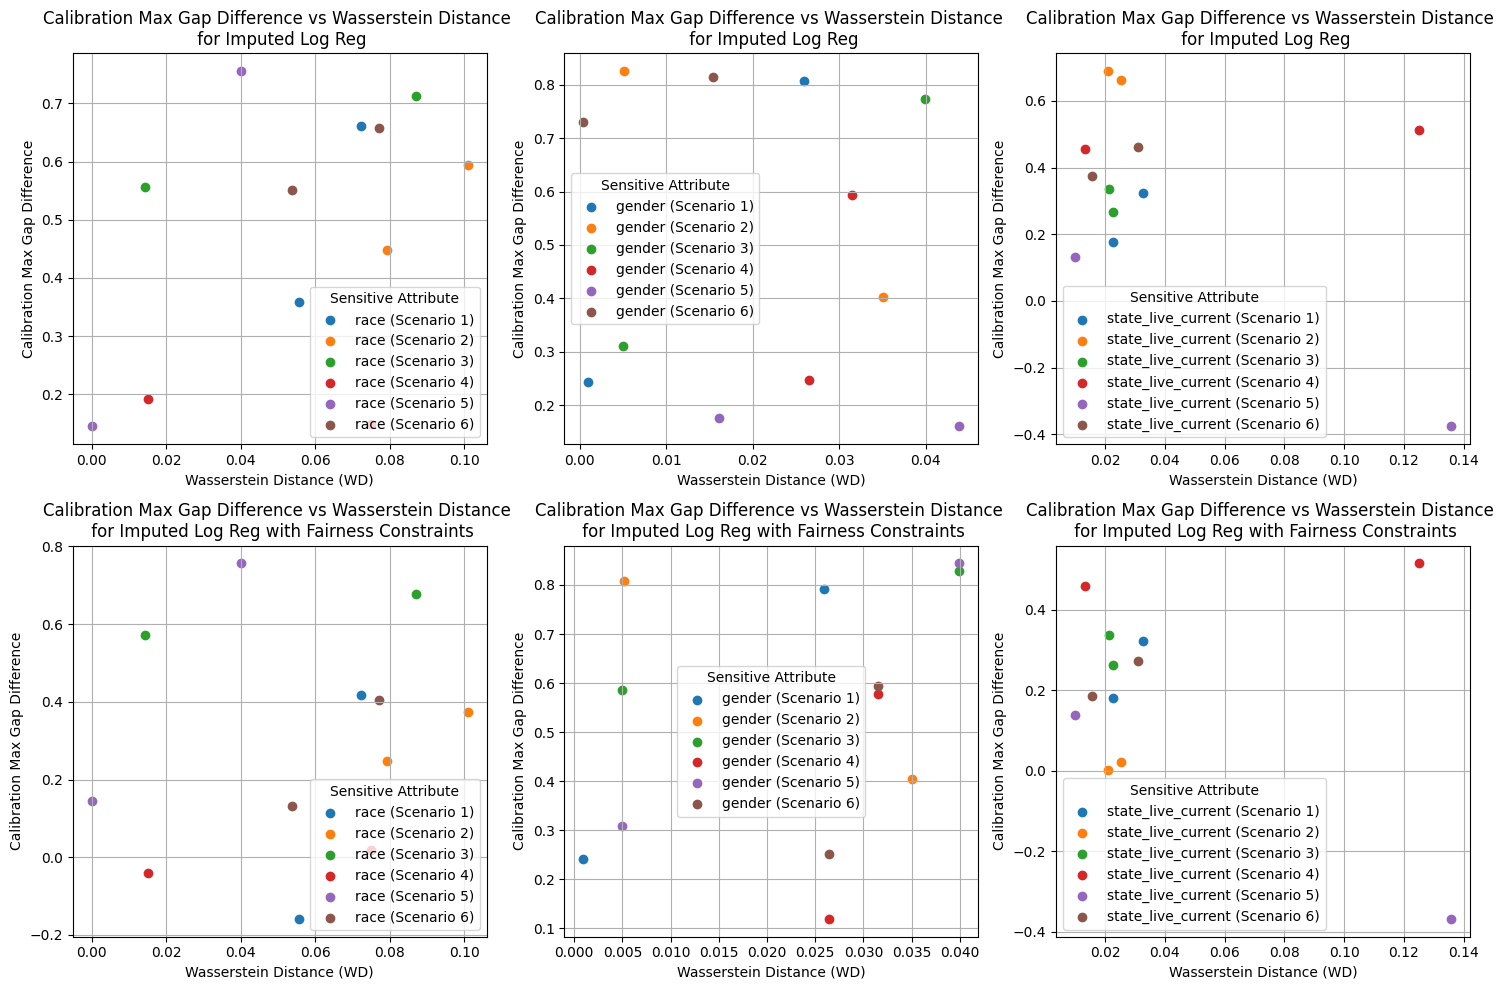

In [ ]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 

for i, ax in enumerate(axes[0, :]):
    attribute = protected_attributes[i]
    for x in range(len(all_max_gap)):
        x_values = all_was_dist[x][attribute]
        y_raw = all_max_gap[x][attribute]
        y_values = [y - y_raw[0] for y in y_raw]
        ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Calibration Max Gap Difference vs Wasserstein Distance \n for Imputed Log Reg")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Calibration Max Gap Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

for i, ax in enumerate(axes[1, :]):
    attribute = protected_attributes[i]
    for x in range(len(all_max_gap_fair)):
        x_values = all_was_dist_fair[x][attribute]
        y_raw = all_max_gap_fair[x][attribute]
        y_values = [y - y_raw[0] for y in y_raw]
        ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Calibration Max Gap Difference vs Wasserstein Distance \n for Imputed Log Reg with Fairness Constraints")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Calibration Max Gap Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()


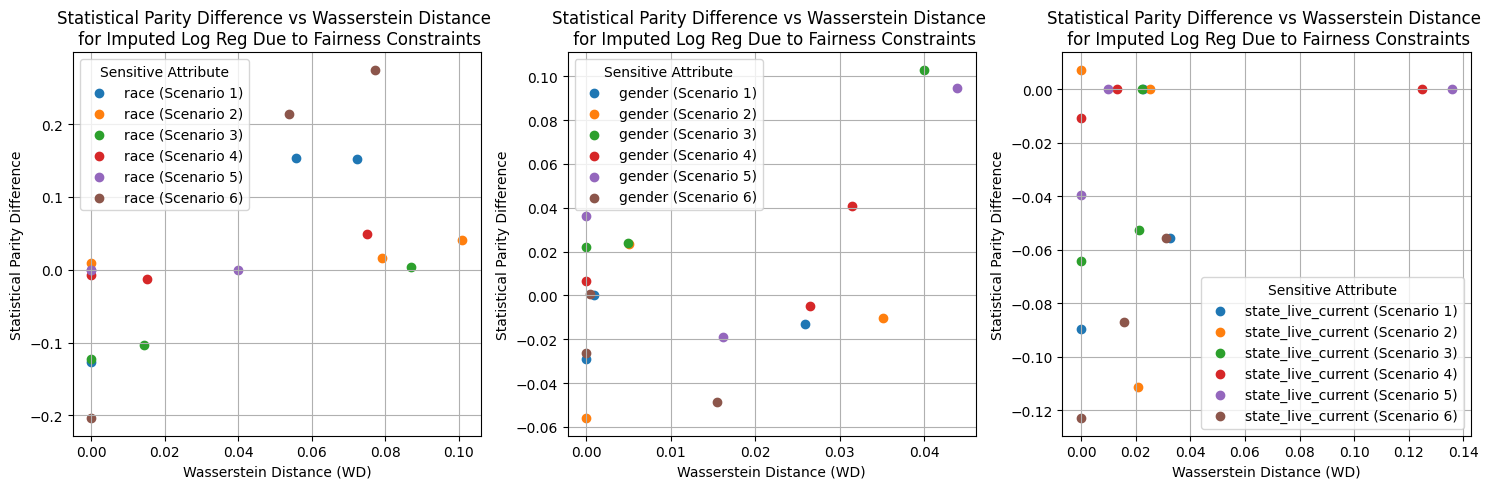

In [ ]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for i, ax in enumerate(axes): 
    attribute = protected_attributes[i]
    for x in range(len(all_sp)):
        x_values = all_was_dist[x][attribute]
        y_raw = [b - a for a, b in zip(all_sp[x][attribute], all_sp_fair[x][attribute])]
        y_values = y_raw
        ax.scatter(x_values, y_values, marker='o', label=f"{attribute} (Scenario {x+1})")
        #y_values = [y - y_raw[0] for y in y_raw]
        #ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Statistical Parity Difference vs Wasserstein Distance \n for Imputed Log Reg Due to Fairness Constraints")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Statistical Parity Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()


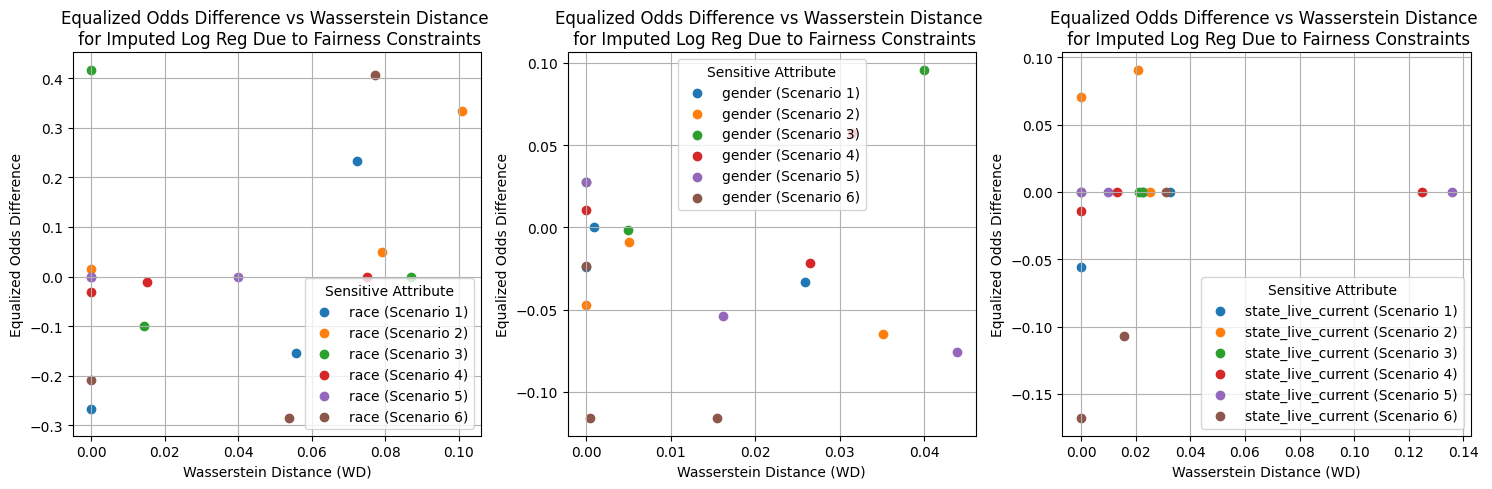

In [ ]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for i, ax in enumerate(axes):
    attribute = protected_attributes[i]
    for x in range(len(all_eo)):
        x_values = all_was_dist[x][attribute]
        y_raw = [b - a for a, b in zip(all_eo[x][attribute], all_eo_fair[x][attribute])]
        y_values = y_raw
        ax.scatter(x_values, y_values, marker='o', label=f"{attribute} (Scenario {x+1})")
        #y_values = [y - y_raw[0] for y in y_raw]
        #ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Equalized Odds Difference vs Wasserstein Distance \n for Imputed Log Reg Due to Fairness Constraints")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Equalized Odds Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()


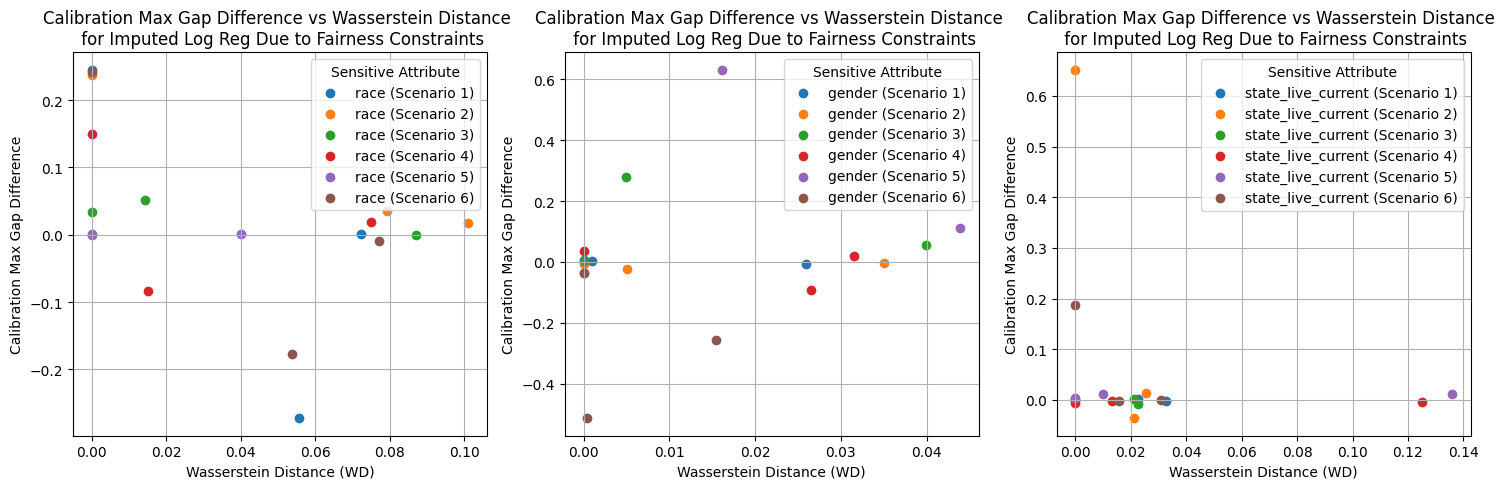

In [ ]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for i, ax in enumerate(axes):  
    attribute = protected_attributes[i]
    for x in range(len(all_max_gap)):
        x_values = all_was_dist[x][attribute]
        y_raw = [b -a for a, b in zip(all_max_gap[x][attribute], all_max_gap_fair[x][attribute])]
        y_values = y_raw
        ax.scatter(x_values, y_values, marker='o', label=f"{attribute} (Scenario {x+1})")
        #y_values = [y - y_raw[0] for y in y_raw]
        #ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Calibration Max Gap Difference vs Wasserstein Distance \n for Imputed Log Reg Due to Fairness Constraints")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Calibration Max Gap Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()


# Imputed MLP vs MLP with Fairness Constraints

In [60]:
with open('./mlp_imputed/mlp_imputed_was_dist.pkl', 'rb') as file:
    all_was_dist = pickle.load(file)

with open('./mlp_imputed/mlp_imputed_sp.pkl', 'rb') as file:
    all_sp = pickle.load(file)

with open('./mlp_imputed/mlp_imputed_eo.pkl', 'rb') as file:
    all_eo = pickle.load(file)

with open('./mlp_imputed/mlp_imputed_max_gap.pkl', 'rb') as file:
    all_max_gap = pickle.load(file)

In [62]:
SENS_ATTR = "race"

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_was_dist.pkl', 'rb') as file:
    all_was_dist_fair_race = pickle.load(file)

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_sp.pkl', 'rb') as file:
    all_sp_fair_race = pickle.load(file)

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_eo.pkl', 'rb') as file:
    all_eo_fair_race = pickle.load(file)

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_max_gap.pkl', 'rb') as file:
    all_max_gap_fair_race = pickle.load(file)

In [63]:
SENS_ATTR = "gender"

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_was_dist.pkl', 'rb') as file:
    all_was_dist_fair_gender = pickle.load(file)

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_sp.pkl', 'rb') as file:
    all_sp_fair_gender = pickle.load(file)

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_eo.pkl', 'rb') as file:
    all_eo_fair_gender = pickle.load(file)

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_max_gap.pkl', 'rb') as file:
    all_max_gap_fair_gender = pickle.load(file)

In [64]:
SENS_ATTR = "state_live_current"

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_was_dist.pkl', 'rb') as file:
    all_was_dist_fair_state_live_current = pickle.load(file)

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_sp.pkl', 'rb') as file:
    all_sp_fair_state_live_current = pickle.load(file)

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_eo.pkl', 'rb') as file:
    all_eo_fair_state_live_current = pickle.load(file)

with open(f'./exponentiated_gradient_imputed_mlp/{SENS_ATTR}/exponentiated_gradient_imputed_mlp_max_gap.pkl', 'rb') as file:
    all_max_gap_fair_state_live_current = pickle.load(file)

In [65]:
all_sp_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_sp_fair_race)):
    all_sp_fair[scenario]['race'] = all_sp_fair_race[scenario]['race']
    all_sp_fair[scenario]['gender'] = all_sp_fair_gender[scenario]['gender']
    all_sp_fair[scenario]['state_live_current'] = all_sp_fair_state_live_current[scenario]['state_live_current']

all_eo_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_eo_fair_race)):
    all_eo_fair[scenario]['race'] = all_eo_fair_race[scenario]['race']
    all_eo_fair[scenario]['gender'] = all_eo_fair_gender[scenario]['gender']
    all_eo_fair[scenario]['state_live_current'] = all_eo_fair_state_live_current[scenario]['state_live_current']

all_max_gap_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_max_gap_fair_race)):
    all_max_gap_fair[scenario]['race'] = all_max_gap_fair_race[scenario]['race']
    all_max_gap_fair[scenario]['gender'] = all_max_gap_fair_gender[scenario]['gender']
    all_max_gap_fair[scenario]['state_live_current'] = all_max_gap_fair_state_live_current[scenario]['state_live_current']

all_was_dist_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_was_dist_fair_race)):
    all_was_dist_fair[scenario]['race'] = all_was_dist_fair_race[scenario]['race']
    all_was_dist_fair[scenario]['gender'] = all_was_dist_fair_gender[scenario]['gender']
    all_was_dist_fair[scenario]['state_live_current'] = all_was_dist_fair_state_live_current[scenario]['state_live_current']

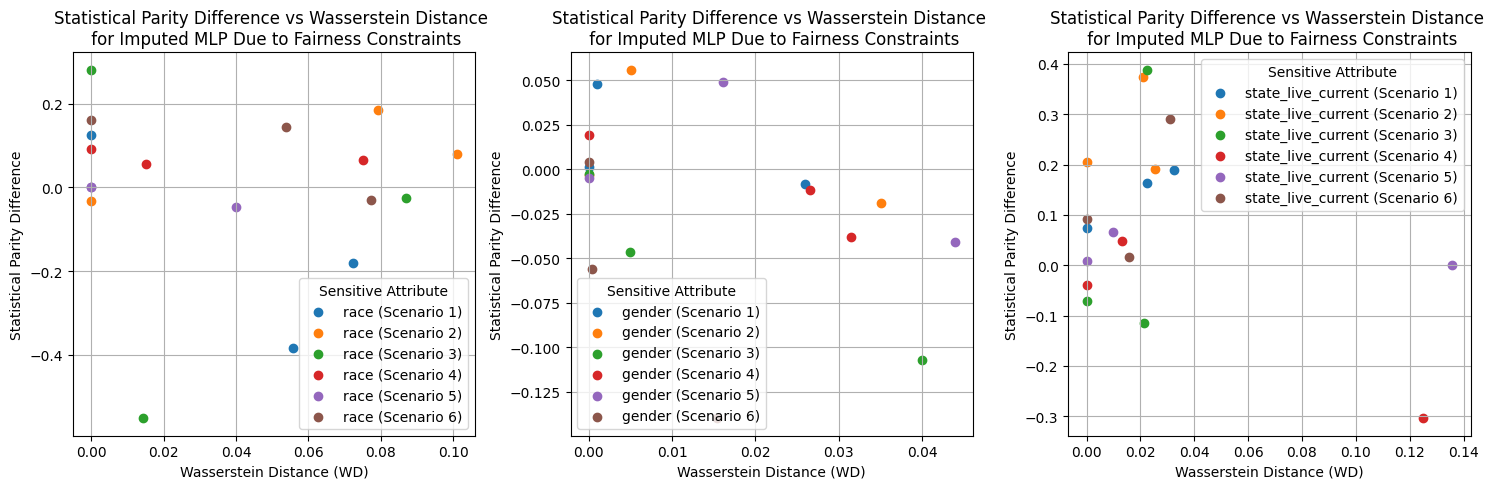

In [66]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for i, ax in enumerate(axes):
    attribute = protected_attributes[i]
    for x in range(len(all_sp)):
        x_values = all_was_dist[x][attribute]
        y_raw = [b - a for a, b in zip(all_sp[x][attribute], all_sp_fair[x][attribute])]
        y_values = y_raw
        ax.scatter(x_values, y_values, marker='o', label=f"{attribute} (Scenario {x+1})")
        #y_values = [y - y_raw[0] for y in y_raw]
        #ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Statistical Parity Difference vs Wasserstein Distance \n for Imputed MLP Due to Fairness Constraints")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Statistical Parity Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()


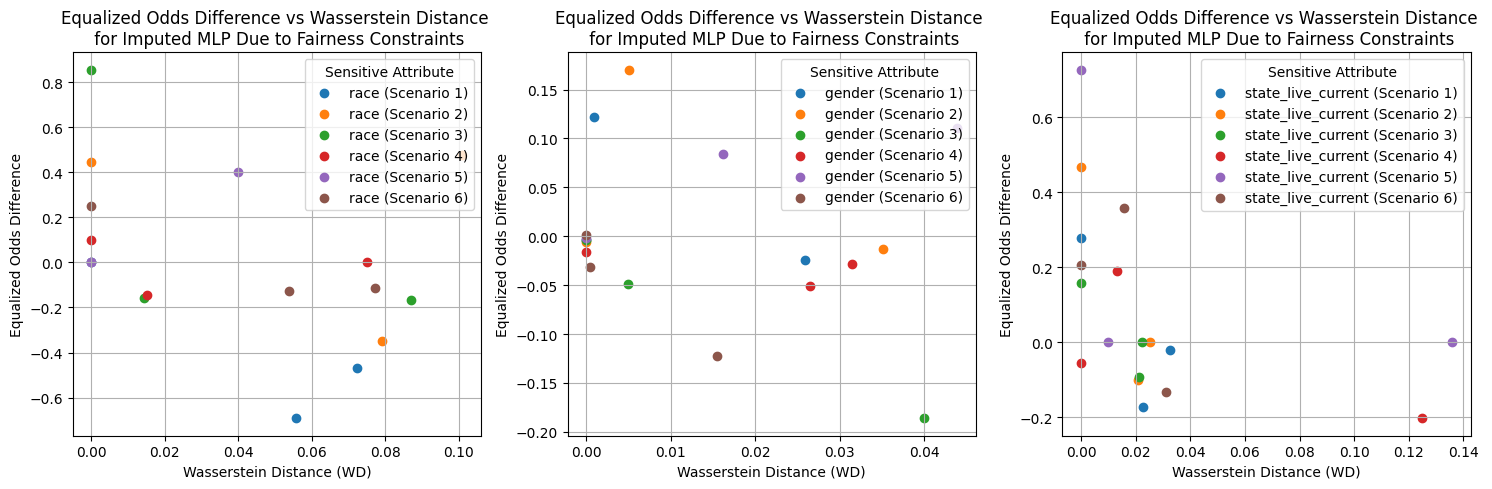

In [67]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for i, ax in enumerate(axes):
    attribute = protected_attributes[i]
    for x in range(len(all_eo)):
        x_values = all_was_dist[x][attribute]
        y_raw = [b - a for a, b in zip(all_eo[x][attribute], all_eo_fair[x][attribute])]
        y_values = y_raw
        ax.scatter(x_values, y_values, marker='o', label=f"{attribute} (Scenario {x+1})")
        #y_values = [y - y_raw[0] for y in y_raw]
        #ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Equalized Odds Difference vs Wasserstein Distance \n for Imputed MLP Due to Fairness Constraints")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Equalized Odds Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()


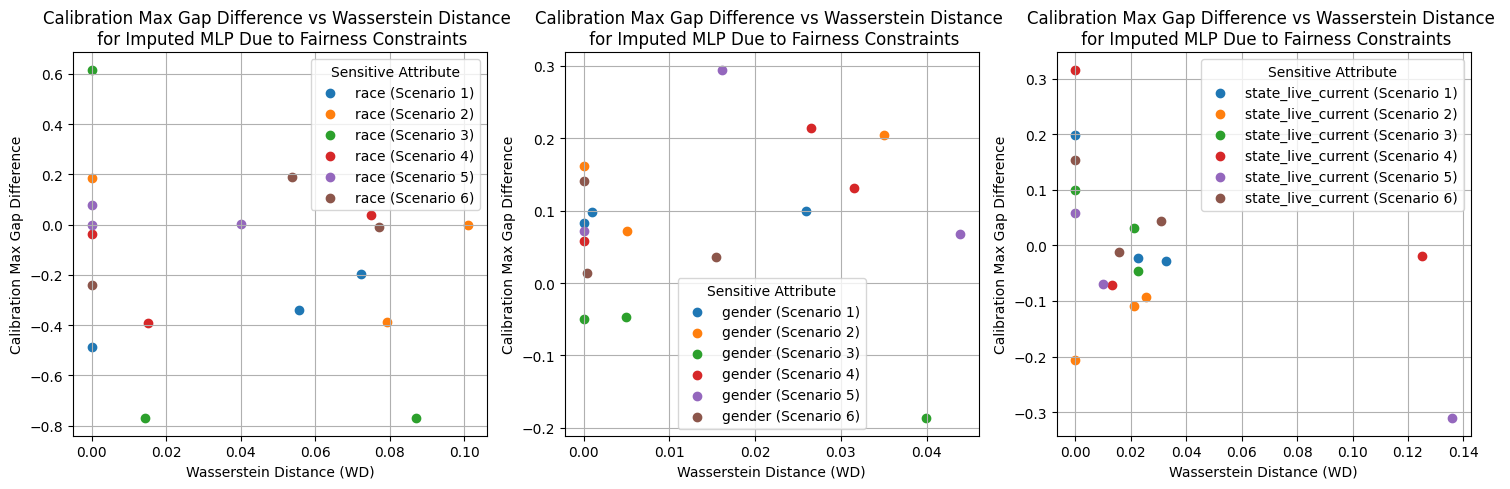

In [68]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for i, ax in enumerate(axes):
    attribute = protected_attributes[i]
    for x in range(len(all_max_gap)):
        x_values = all_was_dist[x][attribute]
        y_raw = [b - a for a, b in zip(all_max_gap[x][attribute], all_max_gap_fair[x][attribute])]
        y_values = y_raw
        ax.scatter(x_values, y_values, marker='o', label=f"{attribute} (Scenario {x+1})")
        #y_values = [y - y_raw[0] for y in y_raw]
        #ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Calibration Max Gap Difference vs Wasserstein Distance \n for Imputed MLP Due to Fairness Constraints")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Calibration Max Gap Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()


# Imputed MLP vs Adversarial Fairness Classifier

In [95]:
with open('./mlp_imputed/mlp_imputed_was_dist.pkl', 'rb') as file:
    all_was_dist = pickle.load(file)

with open('./mlp_imputed/mlp_imputed_sp.pkl', 'rb') as file:
    all_sp = pickle.load(file)

with open('./mlp_imputed/mlp_imputed_eo.pkl', 'rb') as file:
    all_eo = pickle.load(file)

with open('./mlp_imputed/mlp_imputed_max_gap.pkl', 'rb') as file:
    all_max_gap = pickle.load(file)

In [105]:
SENS_ATTR = "race"

with open(f'./adversarial_classifier/{SENS_ATTR}/adv_was_dist.pkl', 'rb') as file:
    all_was_dist_fair_race = pickle.load(file)

with open(f'./adversarial_classifier/{SENS_ATTR}/adv_sp.pkl', 'rb') as file:
    all_sp_fair_race = pickle.load(file)

with open(f'./adversarial_classifier/{SENS_ATTR}/adv_eo.pkl', 'rb') as file:
    all_eo_fair_race = pickle.load(file)


In [97]:
SENS_ATTR = "gender"

with open(f'./adversarial_classifier/{SENS_ATTR}/adv_was_dist.pkl', 'rb') as file:
    all_was_dist_fair_gender = pickle.load(file)

with open(f'./adversarial_classifier/{SENS_ATTR}/adv_sp.pkl', 'rb') as file:
    all_sp_fair_gender = pickle.load(file)

with open(f'./adversarial_classifier/{SENS_ATTR}/adv_eo.pkl', 'rb') as file:
    all_eo_fair_gender = pickle.load(file)


In [98]:
SENS_ATTR = "state_live_current"

with open(f'./adversarial_classifier/{SENS_ATTR}/adv_was_dist.pkl', 'rb') as file:
    all_was_dist_fair_state_live_current = pickle.load(file)

with open(f'./adversarial_classifier/{SENS_ATTR}/adv_sp.pkl', 'rb') as file:
    all_sp_fair_state_live_current= pickle.load(file)

with open(f'./adversarial_classifier/{SENS_ATTR}/adv_eo.pkl', 'rb') as file:
    all_eo_fair_state_live_current = pickle.load(file)


In [109]:
all_sp_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_sp_fair_race)):
    all_sp_fair[scenario]['race'] = all_sp_fair_race[scenario]['race']
    all_sp_fair[scenario]['gender'] = all_sp_fair_gender[scenario]['gender']
    all_sp_fair[scenario]['state_live_current'] = all_sp_fair_state_live_current[scenario]['state_live_current']

all_eo_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_eo_fair_race)):
    all_eo_fair[scenario]['race'] = all_eo_fair_race[scenario]['race']
    all_eo_fair[scenario]['gender'] = all_eo_fair_gender[scenario]['gender']
    all_eo_fair[scenario]['state_live_current'] = all_eo_fair_state_live_current[scenario]['state_live_current']

all_was_dist_fair = [{},{},{},{},{},{}]
for scenario in range(len(all_was_dist_fair_race)):
    all_was_dist_fair[scenario]['race'] = all_was_dist_fair_race[scenario]['race']
    all_was_dist_fair[scenario]['gender'] = all_was_dist_fair_gender[scenario]['gender']
    all_was_dist_fair[scenario]['state_live_current'] = all_was_dist_fair_state_live_current[scenario]['state_live_current']

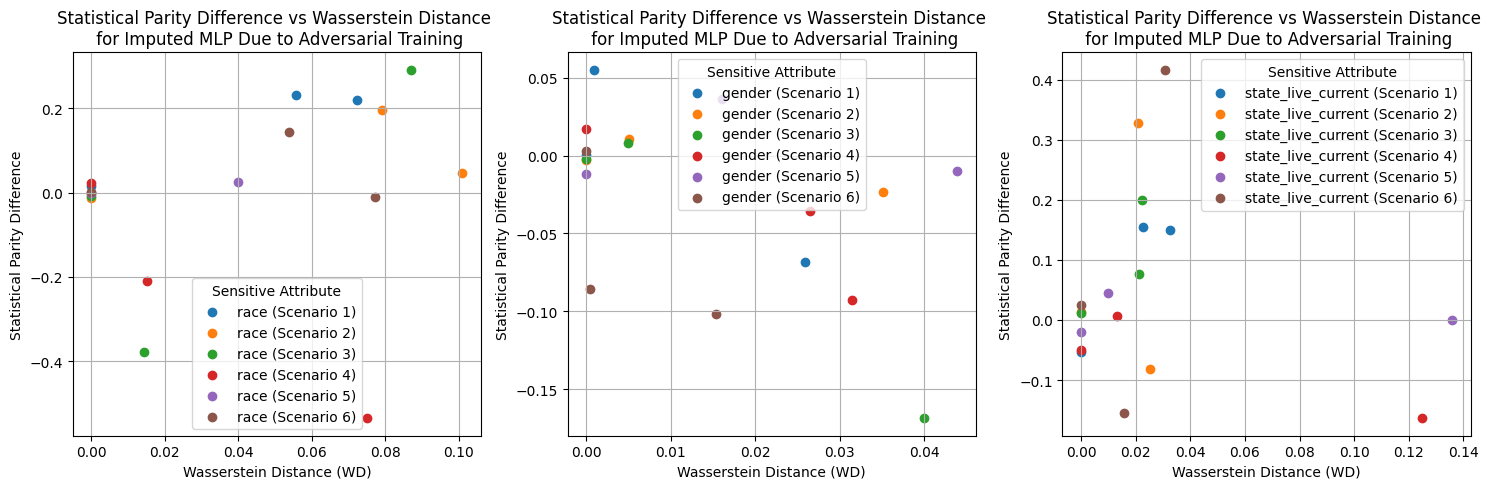

In [110]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for i, ax in enumerate(axes):
    attribute = protected_attributes[i]
    for x in range(len(all_sp)):
        x_values = all_was_dist[x][attribute]
        y_raw = [b - a for a, b in zip(all_sp[x][attribute], all_sp_fair[x][attribute])]
        y_values = y_raw
        ax.scatter(x_values, y_values, marker='o', label=f"{attribute} (Scenario {x+1})")
        #y_values = [y - y_raw[0] for y in y_raw]
        #ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Statistical Parity Difference vs Wasserstein Distance \n for Imputed MLP Due to Adversarial Training")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Statistical Parity Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()


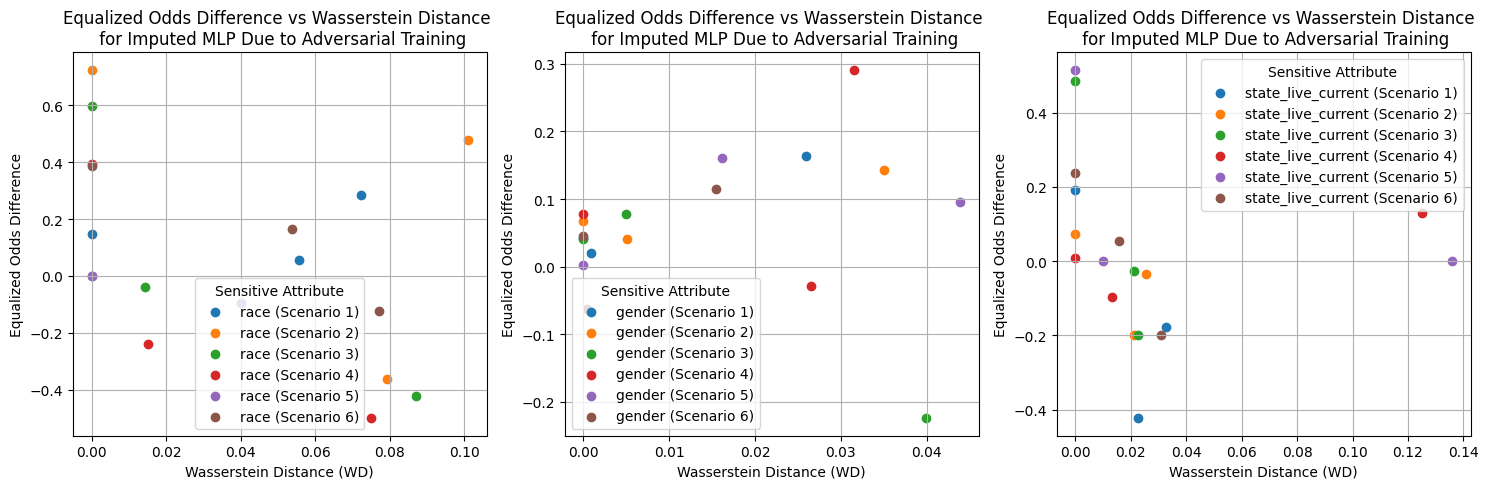

In [112]:
protected_attributes = ['race', 'gender', 'state_live_current']

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for i, ax in enumerate(axes):
    attribute = protected_attributes[i]
    for x in range(len(all_eo)):
        x_values = all_was_dist[x][attribute]
        y_raw = [b - a for a, b in zip(all_eo[x][attribute], all_eo_fair[x][attribute])]
        y_values = y_raw
        ax.scatter(x_values, y_values, marker='o', label=f"{attribute} (Scenario {x+1})")
        #y_values = [y - y_raw[0] for y in y_raw]
        #ax.scatter(x_values[1:], y_values[1:], marker='o', label=f"{attribute} (Scenario {x+1})")
    
    ax.set_title(f"Equalized Odds Difference vs Wasserstein Distance \n for Imputed MLP Due to Adversarial Training")
    ax.set_xlabel("Wasserstein Distance (WD)")
    ax.set_ylabel("Equalized Odds Difference")
    ax.legend(title="Sensitive Attribute")
    ax.grid(True)

plt.tight_layout()
plt.show()
